<a href="https://colab.research.google.com/github/gunjanak/Pytorch_Course/blob/main/2_Basic_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [1]:
import pandas as pd
import numpy as np
import torch

#Load File

In [2]:
circles = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python_Course/PyTorch_Course/circles.csv",index_col=0)

In [3]:
circles.head()

,X1,X2,Y
0,1.000000,0.000000,0
1,0.995004,0.099833,0
2,0.980067,0.198669,0
3,0.955336,0.295520,0
4,0.921061,0.389418,0


In [4]:
circles.describe()

,X1,X2,Y
count,756.000000,756.000000,756.000000
mean,0.017341,-0.000722,0.500000
std,5.214514,5.200669,0.500331
min,-11.989622,-11.999079,0.000000
25%,-3.428623,-3.383375,0.000000
50%,-0.060171,0.000000,0.500000
75%,3.423843,3.395651,1.000000
max,12.000000,11.994883,1.000000


In [5]:
circles.nunique()

X1    756
X2    745
Y       2
dtype: int64

In [6]:
circles['Y'].unique()

array([0, 1])

#Comverting each column data to numpy array

In [7]:
x1 = circles['X1'].values
x2 = circles['X2'].values
y = circles['Y'].values
#combining two inputs in one
x = [x1,x2]


#From numpy array to pytorch tensor

In [8]:
X = torch.Tensor(x)
Y = torch.Tensor(y)
print(f"Size of X: {X.size()}")
#Trasposing input
X = torch.transpose(X,0,1)
print(f"New size of X: {X.size()}")

#preparing output for neural network
print(f"Size of Y: {Y.size()}")
Y = torch.unsqueeze(Y,1)
print(f"Size of Y: {Y.size()}")

Size of X: torch.Size([2, 756])
New size of X: torch.Size([756, 2])
Size of Y: torch.Size([756])
Size of Y: torch.Size([756, 1])


<ipython-input-8-64f9b5ec026a>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  X = torch.Tensor(x)


#Plotting the data

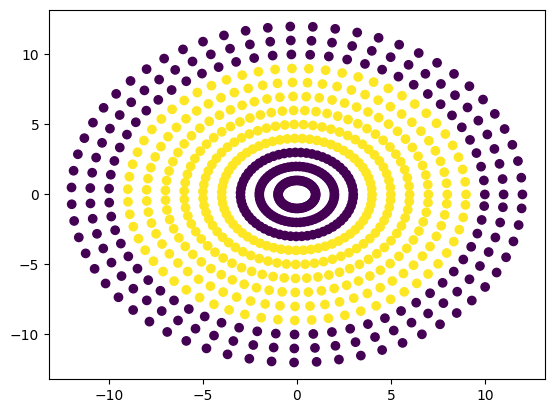

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y)

#Neural Network

In [10]:
import torch.nn as nn

In [11]:
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    #define the hidden layer
    self.input_to_hidden_layer = nn.Linear(2,8)
    #define activation function of hidden Layer
    self.hidden_layer_activation = nn.ReLU()

    #define hidden layer
    self.hidden_layer_to_hidden_layer = nn.Linear(8,8)

    #define ourput layer
    self.hidden_to_output_layer = nn.Linear(8,1)

    #define activation function to ouput layer
    self.output_layer_activation = nn.Sigmoid()

  #Define feed forward network based on above definitions
  def forward(self,x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_layer_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    x = self.output_layer_activation(x)
    return x

In [12]:
mynet = MyNeuralNet()

#Loss function

In [13]:
#Binary cross entropy
loss_func = torch.nn.BCELoss()

#Setting ADAM as an optimizer

In [14]:
from torch.optim import Adam
opt = Adam(mynet.parameters(),lr=0.01)

#Defining Accuracy

In [15]:
def accuracy(Y,z):
  #returs accuracy and y_hat
  y_hat = torch.round(z.data)
  is_correct = y_hat==Y
  is_correct = is_correct.numpy().tolist()
  # print(is_correct)
  val_epoch_accuracies = np.mean(is_correct)
  Y_hat = y_hat.data.numpy()
  list_to_return = [val_epoch_accuracies,y_hat]
  return list_to_return

#The main loop

In [16]:
loss_history = []
accuracy_history = []
interval_prediction = []
epochs = 101

for epoch in range(epochs):
  opt.zero_grad()

  #feeding data to network
  z = mynet(X)

  #calculating accuracy
  acc = accuracy(Y,z)

  #Accuracy after each epoch
  accuracy_epoch = acc[0]

  #Network prediction after each epoch
  y_hat = acc[1]

  #Calculating loss
  loss_value = loss_func(z,Y)

  #backpropagation
  loss_value.backward()

  #perform a single optimization step (parameter update)
  opt.step()

  #converting loss_value to numpy
  loss_value = loss_value.data.numpy()

  #Appending loss_value to loss_history
  loss_history.append(loss_value)

  #Appending accuracy_epoch to accuracy_history
  accuracy_history.append(accuracy_epoch)

  #collecting predicted values after 10th epoch
  if(epoch%10 == 0):
    interval_prediction.append(y_hat)



#plotting Loss

Text(0, 0.5, 'Loss Values')

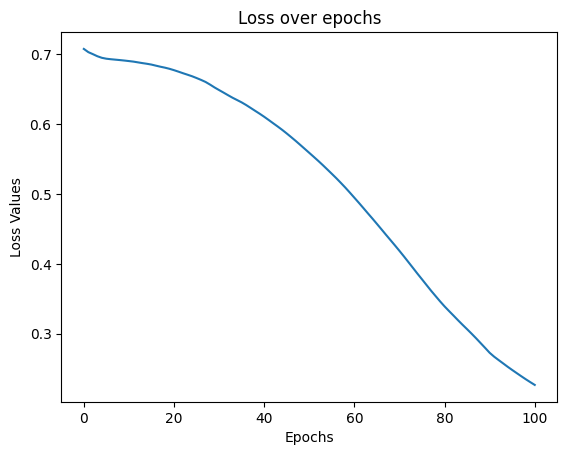

In [17]:
plt.plot(loss_history)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Values")

#Plotting Accuracy

Text(0, 0.5, 'Accuracy')

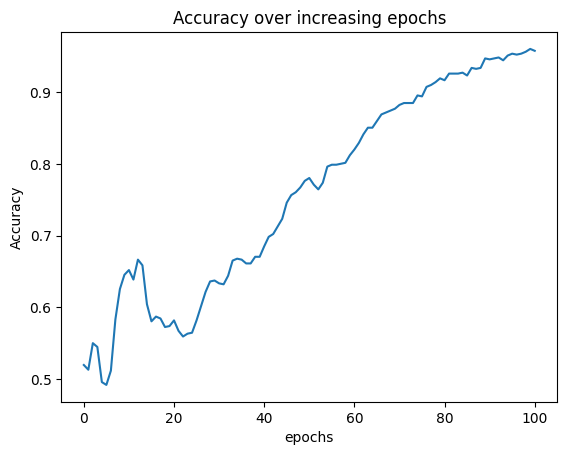

In [18]:
plt.plot(accuracy_history)
plt.title('Accuracy over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

#Plots to show performance of neural network over epochs

3.7.1


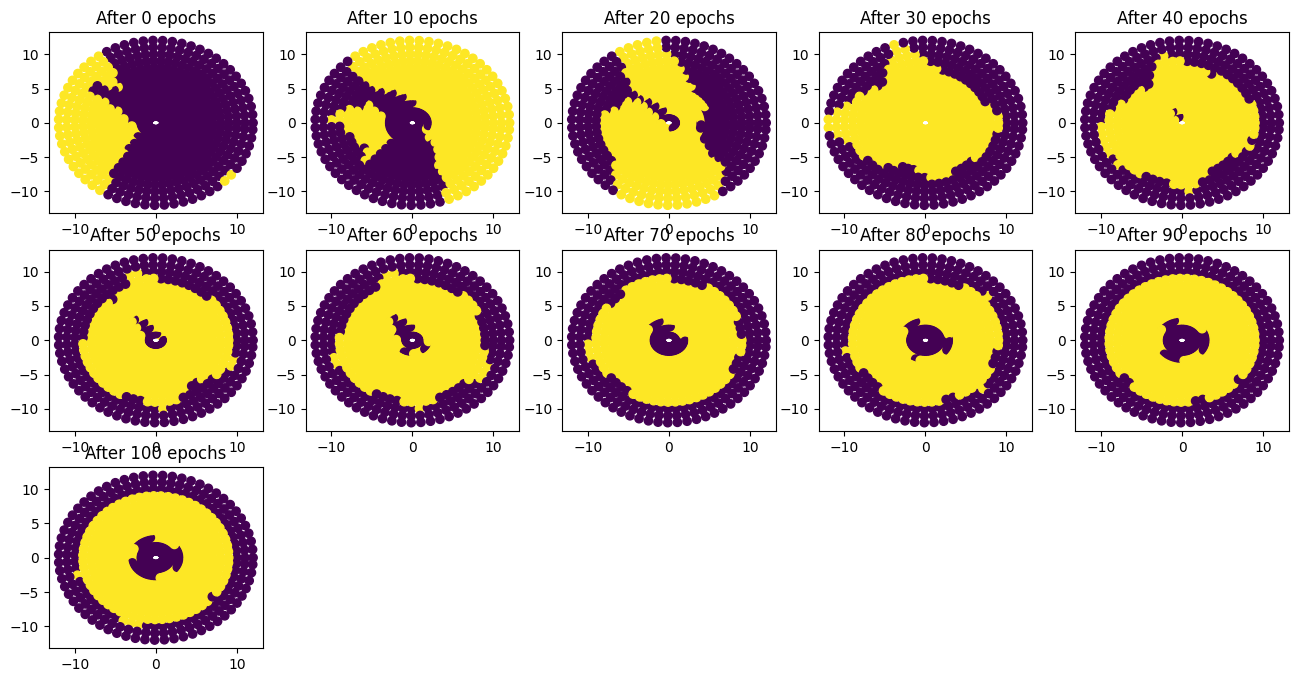

In [24]:
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

for i in range(11):
  epoch = (i*10)
  plt.subplot(3, 5, i + 1)
  plt.scatter(X[:, 0], X[:, 1],c=interval_prediction[i])
  plt.title("After {} epochs".format(str(epoch)))

plt.show()
